<img src="tsf.png"> 

# Decision Tree:
## *It is a tree that has flowchart like structure, and it is used for the PREDICTION and CLASSIFICATION   of data.
### *The leaf nodes of decision tree represents the class labels=(yes/no;Risk/Safe),top node is root.

# Task:
## *From the given Iris data set,we need to predict the clusters and represent them in the visual format

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('Iris.csv')
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()  #shows the entire information about dataset
df.describe() #it describe all the highest,lowest,count and medium values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Pairplot: it plots pair-wise relationship in a dataset
## It describes the dataset in visual format and it says given dataset contains 4 features and 3 species,as you can see below. 

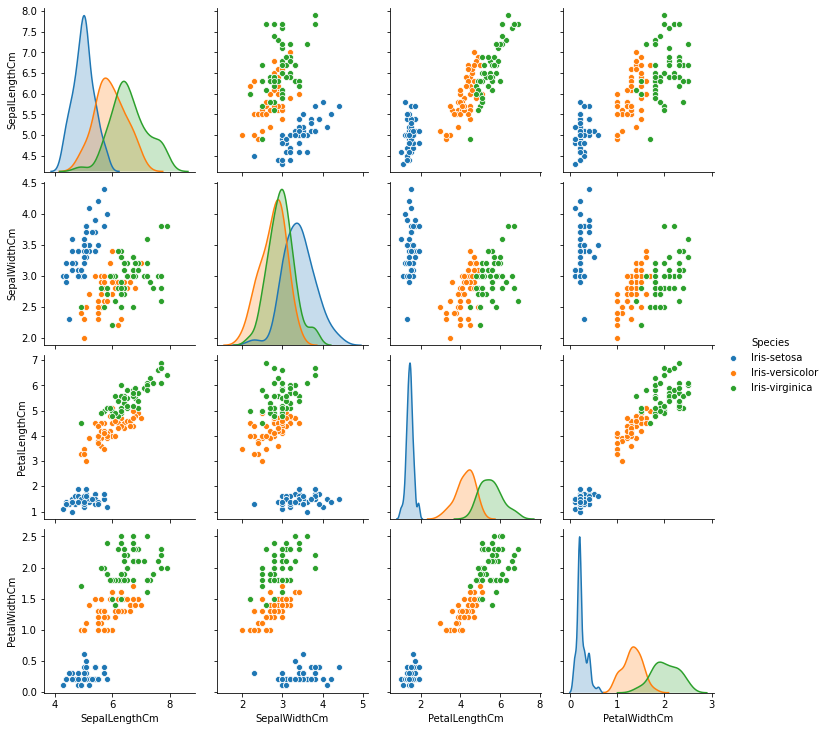

In [6]:
sns.pairplot(df, hue='Species')

In [7]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [8]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
y=lbe.fit_transform(y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=50)

## Decision tree classifier algorithm 

In [9]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(xtrain,ytrain)    

DecisionTreeClassifier()

In [10]:
ypred=dc.predict(xtest)  # predicting on the testing data.
ypred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

### The accuracy we achieved is almost 1

In [12]:
accuracy_score(ytest,ypred)

0.9666666666666667

### the classified Data

In [13]:
print("Classification Report is:\n")
print(classification_report(ytest,ypred))

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [14]:
print("Confusion Matrix is:\n")
print(confusion_matrix(ytest,ypred))

Confusion Matrix is:

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [15]:
clf= DecisionTreeClassifier(random_state = 100)

#fitting the training data

clf.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=100)

### Final Decision tree

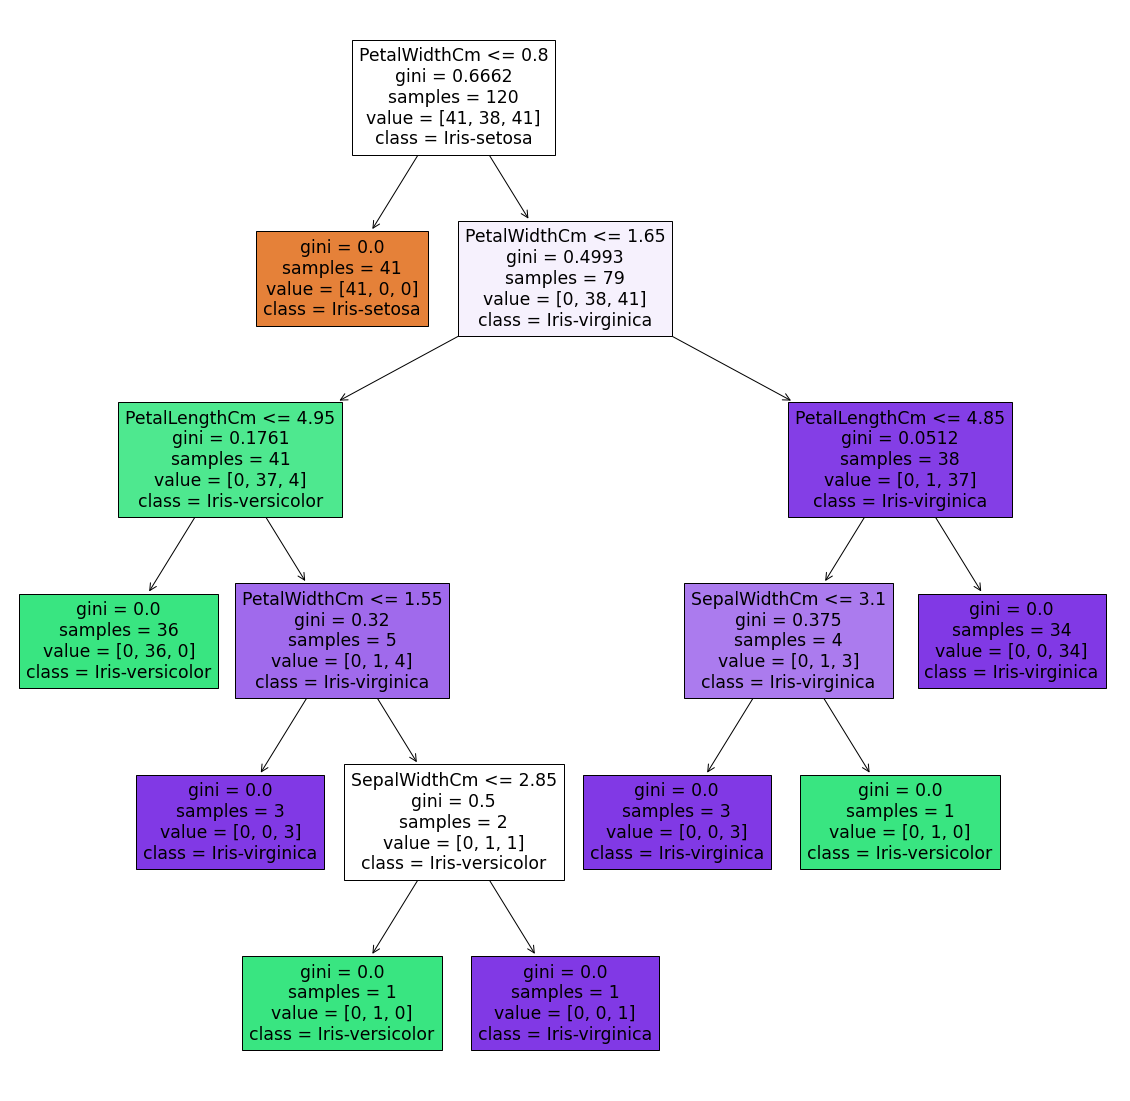

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree_img= plot_tree(dc,feature_names=df.columns, class_names=df['Species'].unique().tolist(),
                   precision=4,label="all",filled=True)
plt.show()

In [17]:
# Now it's time to train a Support Vector Machine Classifier. 
# Call the SVC() model from sklearn and fit the model to the training data.
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(xtrain, ytrain)

SVC(C=1)

In [18]:
# Now get predictions from the model and create a confusion matrix and a classification report.
pred=model.predict(xtest)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(ytest, pred))
print('\n')
print(classification_report(ytest, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(ytest, pred))

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



Accuracy score is:  0.9333333333333333


In [19]:
df.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(x, y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [21]:
# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, gamma=0.01)
Mean cross-validated score of the best_estimator:  0.9933333333333333
The number of cross-validation splits (folds/iterations):  3


In [22]:
# Another optition for shuffle is to use cv=KFold, we get 98% accuracy
from sklearn.model_selection import KFold
X=df.drop(['Species'], axis=1)
y=df['Species']
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',
                  cv=KFold(n_splits=3, shuffle=True, random_state=0), verbose=1, refit=True )
grid.fit(x, y)

# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, gamma=0.01)
Mean cross-validated score of the best_estimator:  0.98
The number of cross-validation splits (folds/iterations):  3


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished
